In [1]:
import glob
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import random


In [3]:
f_list = glob.glob('*_data_df.p')
df_list = []
for fname in f_list:
    if 'jupyter' not in fname:
        #if 'guard' in fname:
        df_list.append(pickle.load(open( fname, 'rb' )))
#print(df_list[5])
print(list(df_list[0]))

['label', 'word_count', 'sent_len', 'word_len', 'sent_len_std', 'unique_word_frac', 'cps', 'qps', 'exps', 'adverbs', 'verbs', 'adjectives', 'foreign', 'flesch', 'said_ps', 'and_ps', 'but_ps', 'flesch_five', 'flesch_sec', 'total_adv', 'total_verb', 'total_adj', 'sent_count', 'adv_ps', 'verb_ps', 'adj_ps', 'RB_ps', 'RBR_ps', 'RBS_ps', 'WRB_ps', 'VB_ps', 'VBD_ps', 'VBG_ps', 'VBN_ps', 'VBP_ps', 'VBZ_ps', 'JJ_ps', 'JJS_ps', 'JJR_ps', 'told_ps', 'ngram_NN IN DT NN', 'ngram_IN DT NN PP', 'ngram_JJ NN IN DT', 'ngram_NN PP DT NN', 'ngram_IN DT JJ NN', 'ngram_VB DT JJ NN', 'ngram_NN IN NN PP', 'ngram_JJ NN IN NN', 'ngram_VB IN DT NN', 'ngram_IN DT NN IN', 'ngram_NN IN JJ NN', 'ngram_VB DT NN IN', 'ngram_DT JJ NN IN', 'ngram_DT NN IN DT', 'ngram_DT NN IN NN', 'ngram_NN PP PRP VB', 'ngram_JJ NN PP VB', 'ngram_PP DT JJ NN', 'ngram_JJ NN PP PP', 'ngram_NN NN NN NN', 'ngram_CD PP CD NN', 'ngram_NN NN NN VB', 'ngram_NN NN VB CD', 'ngram_NN IN NN NN', 'ngram_IN DT NN NN', 'ngram_PP NN NN PP', 'ngram_NN

In [5]:
#print(df_list)
full_feature_df = pd.concat(df_list)
#print(full_feature_df)
print(len(list(full_feature_df)))

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


1515


In [6]:
full_feature_df = full_feature_df.loc[full_feature_df['sent_count'] > 5]

In [45]:
full_feature_df['sent_len_mean_over_std'] = full_feature_df['sent_len']/full_feature_df['sent_len_std']
full_feature_df = full_feature_df.loc[(full_feature_df['sent_len_std'] > 0) & (full_feature_df['sent_len'] > 0)]

In [ ]:
feat_list = ['sent_len', 'word_len', 'sent_len_std', 'unique_word_frac', 
             'cps', 'qps', 'exps', 'foreign', 'flesch',  'flesch_five',
             'RB_ps', 'RBR_ps', 'RBS_ps', 'WRB_ps', 'VB_ps', 
             'VBD_ps', 'VBG_ps', 'VBN_ps', 'VBP_ps', 'VBZ_ps', 'JJ_ps', 'JJS_ps', 'JJR_ps',
             'said_ps', 'and_ps', 'but_ps', 'told_ps', 'ngram_NN IN DT NN', 'ngram_IN DT NN PP',
             'ngram_JJ NN IN DT', 'ngram_NN PP DT NN', 'ngram_IN DT JJ NN', 'ngram_VB DT JJ NN',
             'ngram_NN IN NN PP', 'ngram_JJ NN IN NN', 'ngram_VB IN DT NN', 'ngram_IN DT NN IN',
             'ngram_NN IN JJ NN', 'ngram_VB DT NN IN', 'ngram_DT JJ NN IN', 'ngram_DT NN IN DT',
             'ngram_DT NN IN NN', 'ngram_NN PP PRP VB', 'ngram_JJ NN PP VB', 'ngram_PP DT JJ NN',
             'ngram_JJ NN PP PP', 'ngram_NN NN NN NN', 'ngram_CD PP CD NN', 'ngram_NN NN NN VB',
             'ngram_NN NN VB CD', 'ngram_NN IN NN NN', 'ngram_IN DT NN NN', 'ngram_PP NN NN PP',
             'ngram_NN NN NN PP', 'ngram_VB DT NN PP', 'ngram_DT JJ NN PP', 'ngram_PP DT NN NN',
             'ngram_DT NN NN NN', 'ngram_PP PP PRP VB', 'ngram_$ CD PP CD', 'ngram_CD PP CD CD',
             'ngram_DT NN PP PP', 'ngram_PRP VB JJ NN', 'ngram_NN VB IN NN', 'ngram_NN IN DT JJ',
             'ngram_NN VB VB IN', 'ngram_PP DT NN VB', 'ngram_DT JJ NN NN', 'ngram_JJ NN NN VB',
             'ngram_NN NN IN NN', 'ngram_NN NN NN IN', 'ngram_VB PRP$ JJ NN', 'ngram_DT NN NN PP',
             'ngram_JJ NN PP NN', 'ngram_NN VB DT NN', 'ngram_JJ NN PP IN', 'ngram_JJ NN VB VB',
             'ngram_PP JJ NN PP', 'ngram_NN PP PP JJ', 'ngram_IN JJ NN PP', 'ngram_IN PRP$ NN PP',
             'ngram_NN PP NN NN', 'ngram_NN PP NN VB', 'ngram_IN DT NN VB', 'ngram_NN NN PP NN',
             'ngram_JJ NN NN NN', 'ngram_IN PRP VB JJ', 'ngram_NN NN VB NN', 'ngram_NN CC NN PP',
             'ngram_NN PP PRP$ NN', 'ngram_NN NN PP PP', 'ngram_NN PP PP NN', 'ngram_NN IN PRP$ NN',
             'ngram_NN VB IN DT', 'ngram_JJ JJ NN PP', 'ngram_JJ NN NN PP', 'ngram_IN NN NN NN',
             'ngram_NN PP PP PRP', 'ngram_DT NN VB JJ', 'ngram_PP DT NN IN', 'ngram_NN IN PP JJ',
             'ngram_PP PRP VB PP', 'ngram_PP PP NN PP', 'ngram_PRP$ NN CC NN', 'ngram_NN PP JJ NN',
             'ngram_JJ NN PP DT', 'ngram_NN NN PP VB', 'ngram_NN VB JJ NN', 'ngram_PP NN NN VB',
             'ngram_NN PP DT JJ', 'ngram_DT JJ NN VB', 'ngram_NN IN NN IN', 'ngram_NN PP VB DT',
             'ngram_NN NN PP PRP', 'ngram_$ CD CD PP', 'ngram_VB JJ NN PP', 'ngram_JJ JJ NN NN',
             'ngram_DT JJ JJ NN', 'ngram_PP CD PP NN', 'ngram_NN PP NN IN', 'ngram_NN PP NN PP',
             'ngram_PP NN PP NN', 'ngram_NN PP IN DT', 'ngram_PP DT NN PP', 'ngram_NN PP PP DT',
             'ngram_CD NN PP CD', 'ngram_WRB PP NN CD', 'ngram_PP NN CD NN', 'ngram_VB RB RB JJ',
             'ngram_CC JJ NN PP', 'ngram_NN IN NN VB', 'ngram_PP IN DT NN', 'ngram_IN NN PP DT',
             'ngram_DT NN NN IN', 'ngram_NN PP VB IN', 'ngram_NN PP CD NN', 'ngram_PP NN VB PP',
             'ngram_IN NN NN PP', 'ngram_$ CD DT NN', 'ngram_NN NN PP DT', 'ngram_VB IN DT JJ',
             'ngram_VB NN IN NN', 'ngram_PP NN PP PP', 'ngram_NN IN CD PP', 'ngram_PP PRP$ NN VB',
             'ngram_VB IN PRP VB', 'ngram_VB JJ NN NN', 'ngram_VB JJ NN IN', 'ngram_NN NN CC NN',
             'ngram_PP CC PRP VB', 'ngram_NN VB RB VB', 'ngram_TO VB DT NN', 'ngram_IN NN PP PP',
             'ngram_DT NN VB IN', 'ngram_VB JJ NN VB', 'ngram_JJ VB JJ NN', 'ngram_NN VB TO VB',
             'ngram_VB VB IN NN', 'ngram_NN CC NN NN', 'ngram_CD PP CD PP', 'ngram_PP $ CD PP',
             'ngram_VB VB TO VB', 'ngram_NN NN NN RB', 'ngram_NN PP $ CD', 'ngram_VB DT NN NN',
             'ngram_IN $ CD PP', 'ngram_IN PP JJ NN', 'ngram_JJ NN IN JJ', 'ngram_JJ NN PP PRP',
             'ngram_TO DT NN IN', 'ngram_IN JJ NN VB', 'ngram_NN WRB PRP VB', 'ngram_WP PRP VB PP',
             'ngram_WRB PRP VB NN', 'ngram_NN NN VB JJ', 'ngram_PP NN VB IN', 'ngram_VB IN JJ NN',
             'ngram_IN PRP MD VB', 'ngram_PP NN MD VB', 'ngram_CD NN IN NN', 'ngram_PP CD NN PP',
             'ngram_PRP VB TO VB', 'ngram_NN PP IN NN', 'ngram_PP NN CD PP', 'ngram_NN PP NN CD',
             'ngram_DT NN JJ NN', 'ngram_VB IN NN IN', 'ngram_VB $ CD PP', 'ngram_NN IN DT CD',
             'ngram_NN NN IN DT', 'ngram_NN VB VB VB', 'ngram_IN JJ NN NN', 'ngram_JJ CC JJ NN',
             'ngram_VB IN PRP$ NN', 'ngram_PRP VB RB VB', 'ngram_NN CC JJ NN', 'ngram_IN NN IN NN',
             'ngram_DT NN NN VB', 'ngram_PP JJ NN NN', 'ngram_NN PP VB VB', 'ngram_PP PP JJ VB',
             'ngram_IN NN PP NN', 'ngram_NN NN PP CC', 'ngram_JJ NN NN IN', 'ngram_VB TO VB DT',
             'ngram_IN NN CC NN', 'ngram_DT JJ NN CC', 'ngram_IN CD NN NN', 'ngram_NN IN CD NN',
             'ngram_PP NN IN CD', 'ngram_DT NN VB DT', 'ngram_DT NN VB RB', 'ngram_JJ NN PP CC',
             'ngram_PP PP CD PP', 'ngram_PP PP DT NN', 'ngram_PP NN PP PRP', 'ngram_PRP$ JJ NN PP',
             'ngram_IN $ CD CD', 'ngram_$ CD CD IN', 'ngram_NN TO VB NN', 'ngram_VB TO DT NN',
             'ngram_PRP VB DT NN', 'ngram_CD CD NN PP', 'ngram_PP PP NN NN', 'ngram_NN NN PP $',
             'ngram_VB NN IN DT', 'ngram_PP JJ NN IN', 'ngram_DT NN VB PP', 'ngram_NN VB NN NN',
             'ngram_TO VB PRP$ NN', 'ngram_CD NN JJ PP', 'ngram_NN PP PP PP', 'ngram_PP PRP VB JJ',
             'ngram_NN PP PP VB', 'ngram_NN PP WP VB', 'ngram_VB VB IN DT', 'ngram_VB PRP$ NN PP',
             'ngram_NN NN MD VB', 'ngram_NN PP VB RB', 'ngram_PP IN PRP VB', 'ngram_PP JJ NN VB',
             'ngram_PP VB DT NN', 'ngram_NN MD VB VB', 'ngram_IN NN IN DT', 'ngram_DT NN DT NN',
             'ngram_NN NN VB PP', 'ngram_PRP$ NN PP CC', 'ngram_PP NN CC VB', 'ngram_PP NN IN NN',
             'ngram_JJ NN PP RB', 'ngram_PP DT VB PRP', 'ngram_DT VB PRP PP', 'ngram_PP IN NN PP',
             'ngram_NN PP RB IN', 'ngram_NN PP CD PP', 'ngram_PP PRP VB NN', 'ngram_PP PRP MD VB',
             'ngram_NN PP CC VB', 'ngram_PP IN DT JJ', 'ngram_DT NN IN CD', 'ngram_PP VB JJ IN',
             'ngram_VB JJ IN NN', 'ngram_PP PP NN VB', 'ngram_JJ PP NN VB', 'ngram_PRP VB PP PP', 'ngram_NN IN NN CC']

In [17]:
#full_feature_df = pd.concat(df_list)
full_feature_df = full_feature_df.fillna(0)
for i in feat_list:
    if 'ngram_' in i:
        full_feature_df[i] = full_feature_df[i]/full_feature_df['word_count']


import matplotlib.ticker as ticker
#corr = full_feature_df[feat_list].corr()

#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#plt.figure(figsize=(10,10))
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr,cmap=cmap, center=0,
#            square=True, linewidths=.3, cbar_kws={"shrink": .8})




full_feature_df[feat_list].head()

min_word_count = 0

feature_array = full_feature_df.loc[(full_feature_df['word_count'] > min_word_count)][feat_list].values
label_array =   full_feature_df.loc[(full_feature_df['word_count'] > min_word_count)]['label'].values
#print(full_feature_df[feat_list][(full_feature_df >= 0).all(1)].head())

article_counts = full_feature_df.groupby('label')['label'].count().tolist()
class_names = [i.loc[0,'label'] for i in df_list]

In [18]:
#combine features
#X = [[i, j, k, l, m, n, o] for i, j, k, l, m, n, o in zip(
#    sent_len_std, unique_word_frac, word_len, cps, qps, exps, flesch)]#, sup_adv_ps, verb_ps, sent_compound)]
#feature_names = ['sentence variability', 'unique word fraction', 
#                 'mean word length', 'commas per sentence', 'questions per sentence', 
#                 'exclamations per sentence', 'flesch']#, 'adverbs per sentence', 
                 #'verbs per sentence', 'sent_compound']



X = feature_array
feature_names = feat_list
#print(label_array)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_names)

print(list(le.classes_))

#print(le.transform(["tokyo", "tokyo", "paris"]))

#print(list(le.inverse_transform([2, 2, 1])))



Y = le.transform(label_array)#[np.where(label_array, i)[0] for i in label_array]

n_samples = len(X)

data_boundaries = article_counts
#data_boundaries = [n_articles for i in [nyt, breit, wapo, guard]]
print(data_boundaries)
print(class_names)
cumulative_bounds = [0]
for ci, i in enumerate(data_boundaries):
    cumulative_bounds.append(i+cumulative_bounds[ci])
print(cumulative_bounds)
#cumulative_bounds = [0]
#cumulative_bounds = [cumulative_bounds[i-1] + i for i in data_boundaries]
print(len(X))
#X = np.asarray(wc).reshape(-1,1)

#labels
#Y = [0 for i in range(len(nyt_feature_df.word_count))] + \
#    [1 for i in range(len(breit_feature_df.word_count))] + \
#    [2 for i in range(len(wapo_feature_df.word_count))] + \
#    [3 for i in range(len(guard_feature_df.word_count))]
#Y = [0 for i in range(n_articles)] + [1 for i in range(n_articles)] + [2 for i in range(n_articles)] + [3 for i in range(n_articles)]
print(len(Y))


['atl', 'breit', 'buzz', 'fox', 'guard', 'natrev', 'nyt', 'vox', 'wapo']
[4921, 4667, 4605, 4229, 4856, 4903, 4970, 4933, 4864]
['nyt', 'atl', 'fox', 'natrev', 'breit', 'wapo', 'buzz', 'vox', 'guard']
[0, 4921, 9588, 14193, 18422, 23278, 28181, 33151, 38084, 42948]
42948
42948


In [19]:
#test train split
from sklearn.model_selection import train_test_split

indices = np.arange(n_samples)

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, Y, indices, test_size=0.3)
print(idx_train)
print(idx_test)
print(X_train.max())
#text_list = nyt_sent + breit_sent + wapo_sent +guard_sent
#print(len(text_list))

[22008 36867 26640 ... 15014   351 32307]
[35215 15522 22457 ... 20747 18160  4398]
1554.7850936705047


In [53]:
#pca

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[6.25e-01 2.96e-01 4.20e-02 2.90e-02 7.92e-03 1.41e-04 1.01e-04 8.09e-05
 4.00e-05 3.46e-05 2.58e-05 2.34e-05 2.21e-05 1.83e-05 1.56e-05]
[7746.3  5333.41 2007.78 1667.77  872.1   116.48   98.62   88.15   61.98
   57.63   49.75   47.45   46.05   41.95   38.65]


In [15]:
#rf with pca

X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=30)
for i in range(100,4500, 400):
    rand_start = random.randint(0,4500 - i)
    rf_clf = rf_clf.fit(X_t_train[rand_start:rand_start + i], y_train[rand_start:rand_start + i])

    print(rf_clf.score(X_t_test, y_test))
rf_clf = rf_clf.fit(X_t_train, y_train)
print(rf_clf.score(X_t_test, y_test))

y_pred = rf_clf.predict(X_t_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

NameError: name 'pca' is not defined

In [20]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':range(3,20)}
#clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
#clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 


#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=30)
#for i in range(100,4500, 400):
#    rand_start = random.randint(0,4500 - i)
#    rf_clf = rf_clf.fit(X_train[rand_start:rand_start + i], y_train[rand_start:rand_start + i])

#    print(rf_clf.score(X_test, y_test))
rf_clf = rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

y_pred = rf_clf.predict(X_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

0.42017850213426466


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xg_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25,
                                 max_depth=6, random_state=0).fit(X_train, y_train)
print(xg_clf.score(X_test, y_test))

y_pred = xg_clf.predict(X_test)


In [93]:
#fill in df with predicted and true labels
test_df = full_feature_df.iloc[idx_test]
test_df['true'] = y_test
test_df['pred'] = y_pred
print(y_test)

#print(len(idx_test))
#test_df = full_feature_df.lookup(*zip(*array_indices))
#print(test_df[['true','pred']])
true_pred = test_df.loc[test_df['true'] == test_df['pred']]
false_pred = test_df.loc[test_df['true'] != test_df['pred']]
pd.set_option('display.max_columns', None)
print(len(true_pred), len(false_pred))
print((true_pred.describe() - false_pred.describe()))

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[6 5 0 ... 7 5 8]
5883 7221
        word_count     sent_len     word_len  sent_len_std  unique_word_frac  \
count -1338.000000 -1338.000000 -1338.000000  -1338.000000      -1338.000000   
mean    121.513158     0.530597     0.000654      3.598797         -0.010134   
std     183.484339     1.182381    -0.001303      8.116275          0.005866   
min      -2.000000     1.166667    -0.140445      2.000000         -0.002116   
25%      45.000000     0.141466     0.013699      0.888085         -0.016722   
50%      86.000000     0.329825     0.004561      1.180834         -0.012260   
75%     196.500000     0.284341    -0.001385      2.028644         -0.003929   
max    4939.000000  -101.866667    -0.715752   -454.667907          0.000000   

               cps          qps         exps      foreign       flesch  \
count -1338.000000 -1338.000000 -1338.000000 -1338.000000 -1338.000000   
mean      0.012166     0.001631     0.000648     0.392059     0.064967   
std      -0.350101     0.0064

Normalized confusion matrix
[[0.37 0.07 0.05 0.04 0.06 0.15 0.07 0.12 0.07]
 [0.04 0.49 0.09 0.11 0.06 0.08 0.03 0.04 0.06]
 [0.06 0.12 0.42 0.11 0.1  0.02 0.06 0.04 0.07]
 [0.03 0.14 0.09 0.43 0.11 0.05 0.04 0.02 0.1 ]
 [0.09 0.08 0.1  0.11 0.26 0.1  0.09 0.06 0.11]
 [0.12 0.05 0.01 0.01 0.04 0.59 0.01 0.1  0.07]
 [0.07 0.03 0.04 0.03 0.08 0.02 0.63 0.03 0.07]
 [0.1  0.07 0.03 0.02 0.05 0.14 0.02 0.52 0.06]
 [0.08 0.07 0.05 0.07 0.09 0.16 0.09 0.08 0.31]]


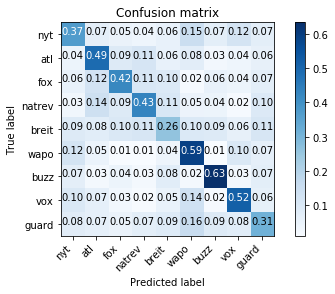

In [82]:
from sklearn.metrics import confusion_matrix
import itertools
#New York Times', 'Breitbart', 'Washington Post', 'Guardian']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha = 'right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix', normalize = True)


Feature ranking:
1. feature 3 (0.086548)
2. feature 23 (0.077945)
3. feature 4 (0.065874)
4. feature 8 (0.056193)
5. feature 1 (0.051869)
6. feature 9 (0.050032)
7. feature 27 (0.043936)
8. feature 10 (0.036317)
9. feature 15 (0.035004)
10. feature 26 (0.034712)
11. feature 14 (0.034319)
12. feature 25 (0.034116)
13. feature 17 (0.033029)
14. feature 18 (0.032675)
15. feature 2 (0.030950)
16. feature 0 (0.030300)
17. feature 20 (0.029987)
18. feature 19 (0.029588)
19. feature 16 (0.027398)
20. feature 11 (0.026181)
21. feature 22 (0.025689)
22. feature 24 (0.025637)
23. feature 5 (0.024890)
24. feature 21 (0.023011)
25. feature 13 (0.019693)
26. feature 12 (0.013670)
27. feature 7 (0.010494)
28. feature 6 (0.009944)
[ 3 23  4  8  1  9 27 10 15 26 14 25 17 18  2  0 20 19 16 11 22 24  5 21
 13 12  7  6]


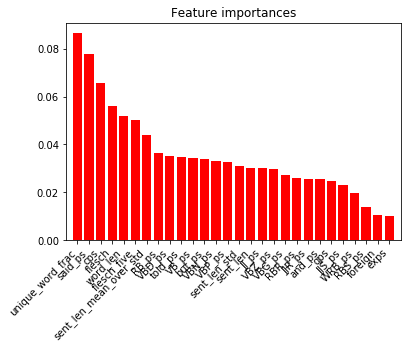

In [94]:
importances = xg_clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in xg_clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):#.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", align='center')#, yerr=std[indices], align="center")
print(indices)
plt.xticks(range(len(X[0])), [feature_names[i] for i in indices], rotation = 45, ha = 'right')
plt.xlim([-1, len(X[0])])
plt.show()

In [ ]:
conf_mat = np.zeros((4,4))
count = 0
for pred, true in zip(y_pred, y_test):
    if pred == 0 and true == 3:
            print(pred, true, count, 'mismatch')
            print(' '.join(text_list[idx_test[count]]))
            input()
    conf_mat[pred,true] += 1.
    count += 1
print(count)
#conf_mat[2,1] += 1000
#[y,x] format (first index (predicted) is on the vertical, second index (truth) is on the horizontal)
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))
print(Counter(y_test))